In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_parquet("/content/drive/MyDrive/work_stuff_USDA/en_clean_gee_data.parquet")

# Save to CSV
df.to_csv("/content/drive/MyDrive/work_stuff_USDA/en_clean_gee_data.csv", index=False)

print("✅ Parquet converted to CSV successfully!")

✅ Parquet converted to CSV successfully!


In [4]:
df.describe()

,plotid,sampleid,BLUE,GREEN,NIR,RED,SWIR1,SWIR2,altura2,aspect,...,lai,mTPI,ndvi,ocs_1mMed,sand_1mMed,savi,silt_1mMed,slope,topDiv,wetness
count,91917.000000,9.191700e+04,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,...,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000,91917.000000
mean,80903.389014,3.236146e+05,0.028759,0.054678,0.326286,0.040685,0.167335,0.077881,22.648094,171.194111,...,0.424549,8129.045423,0.788692,66.444444,308.995599,0.488116,301.564670,11.856382,1324.070790,-0.014942
std,249965.056791,9.998602e+05,0.056796,0.054755,0.094806,0.056447,0.060646,0.040669,9.035709,105.553654,...,0.198203,37.864249,0.149405,19.879848,64.057720,0.121252,57.215726,10.255775,0.304724,0.048994
min,2.000000,5.000000e+00,-0.188643,-0.069183,-0.008353,-0.080238,-0.000982,0.000777,0.000000,0.000000,...,0.000000,7891.000000,-0.974632,0.000000,0.000000,-0.142855,0.000000,0.000000,1323.644835,-0.277014
25%,2813.000000,1.125500e+04,0.016453,0.037187,0.267500,0.020193,0.128928,0.051488,17.000000,81.388336,...,0.245000,8116.000000,0.749062,55.000000,282.750000,0.425358,281.650000,3.380342,1323.771841,-0.036581
50%,5581.000000,2.232500e+04,0.023025,0.047225,0.325278,0.028910,0.162175,0.068153,22.648094,173.548309,...,0.505000,8128.000000,0.838551,63.000000,309.600000,0.506485,302.700000,8.627475,1324.045699,-0.005721
75%,8365.000000,3.346200e+04,0.030697,0.061717,0.384705,0.047033,0.200950,0.095515,29.000000,263.995667,...,0.615000,8139.000000,0.882234,73.000000,341.550000,0.571499,327.650000,17.910181,1324.329039,0.010595
max,910231.000000,3.640929e+06,1.063955,1.024878,0.980080,1.010193,0.562135,0.481972,51.000000,359.030029,...,0.670000,8390.000000,0.999941,150.000000,778.050000,0.902410,599.550000,72.676102,1324.630000,0.733936


In [5]:
data=df

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91917 entries, 9 to 101159
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plotid           91917 non-null  int64  
 1   sampleid         91917 non-null  int64  
 2   Use              91917 non-null  object 
 3   CoverType        91917 non-null  object 
 4   Vegetations      91917 non-null  object 
 5   Herbaceous       91917 non-null  object 
 6   GrasslandShrub   91917 non-null  object 
 7   CropsType        91917 non-null  object 
 8   WetlandArea      91917 non-null  object 
 9   LandType         91917 non-null  object 
 10  WaterBodyType    91917 non-null  object 
 11  OtherClass       91917 non-null  object 
 12  SAF              91917 non-null  object 
 13  Changes_15       91917 non-null  object 
 14  Gain_Loss        91917 non-null  object 
 15  geometry         91917 non-null  object 
 16  BLUE             91917 non-null  float64
 17  GREEN           

In [7]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object or string types)
cat_cols = data.select_dtypes(exclude=['number']).columns

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode each categorical column, handling encoding errors
for col in cat_cols:
    # Exclude 'geometry' column from label encoding
    if col == 'geometry':
        continue
    try:
        data[col] = label_encoder.fit_transform(data[col].astype(str))
    except UnicodeDecodeError:
        # If UnicodeDecodeError occurs, try decoding with 'latin-1' before encoding
        data[col] = label_encoder.fit_transform(data[col].astype(str).str.decode('latin-1', errors='ignore'))  # Decode before encoding

print("✅ All categorical columns have been label encoded.")
print("Encoded columns:", list(cat_cols))

✅ All categorical columns have been label encoded.
Encoded columns: ['Use', 'CoverType', 'Vegetations', 'Herbaceous', 'GrasslandShrub', 'CropsType', 'WetlandArea', 'LandType', 'WaterBodyType', 'OtherClass', 'SAF', 'Changes_15', 'Gain_Loss', 'geometry', 'Forest_Presence']


In [8]:
compressed_data = data.copy()

In [9]:
compressed_data = compressed_data.drop(["Vegetations", "Herbaceous", "GrasslandShrub", "CropsType", "WetlandArea", "LandType", "WaterBodyType", "OtherClass", "SAF", "Changes_15", "Gain_Loss", "geometry","Forest_Presence",'plotid',"sampleid","Use"], axis=1)

In [10]:
compressed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91917 entries, 9 to 101159
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CoverType   91917 non-null  int64  
 1   BLUE        91917 non-null  float64
 2   GREEN       91917 non-null  float64
 3   NIR         91917 non-null  float64
 4   RED         91917 non-null  float64
 5   SWIR1       91917 non-null  float64
 6   SWIR2       91917 non-null  float64
 7   altura2     91917 non-null  float64
 8   aspect      91917 non-null  float64
 9   aspectcos   91917 non-null  float64
 10  aspectdeg   91917 non-null  float64
 11  aspectsin   91917 non-null  float64
 12  brightness  91917 non-null  float64
 13  clay_1mMed  91917 non-null  float64
 14  diff        91917 non-null  float64
 15  elevation   91917 non-null  float64
 16  evi         91917 non-null  float64
 17  fpar        91917 non-null  float64
 18  hand30_100  91917 non-null  float64
 19  lai         91917 non-null  f

# Will try three different techniciques to reduce the number of features for our model.
1. A simple target and features correlation matrix
2.Feature Importance from Random Forest / Tree Models
3.Recursive Feature Elimination

In [ ]:
compressed_data.corr(numeric_only=True)['CoverType'].sort_values(ascending=False)


,CoverType
CoverType,1.000000
ndvi,0.249667
fpar,0.213624
wetness,0.190852
lai,0.182559
savi,0.178642
altura2,0.154547
diff,0.140853
silt_1mMed,0.120936
ocs_1mMed,0.114321


In [ ]:
# We will take the predictors that correlation is atleast 0.05 are greater errir spective of the sign negative
# lets store the correlation in a variable
corr_matrix = compressed_data.corr(numeric_only=True)['CoverType']
print(corr_matrix)

CoverType     1.000000
BLUE         -0.056562
GREEN        -0.078329
NIR           0.060356
RED          -0.125853
SWIR1        -0.157525
SWIR2        -0.230075
altura2       0.154547
aspect       -0.003068
aspectcos     0.000710
aspectdeg    -0.003068
aspectsin    -0.008108
brightness   -0.073112
clay_1mMed    0.088378
diff          0.140853
elevation     0.010221
evi           0.060579
fpar          0.213624
hand30_100    0.056611
lai           0.182559
mTPI          0.004376
ndvi          0.249667
ocs_1mMed     0.114321
sand_1mMed    0.100925
savi          0.178642
silt_1mMed    0.120936
slope         0.088565
topDiv        0.079848
wetness       0.190852
Name: CoverType, dtype: float64


In [ ]:
features_to_drop =  corr_matrix[abs(corr_matrix) < 0.05].index
print(features_to_drop)




Index(['aspect', 'aspectcos', 'aspectdeg', 'aspectsin', 'elevation', 'mTPI'], dtype='object')


In [ ]:
# now we take the orignal dataframe an the drop features and compare to get a new list
correlation_final=[]
for i in compressed_data:
  if i not in features_to_drop:
     correlation_final.append(i)
print(correlation_final)



['CoverType', 'BLUE', 'GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2', 'brightness', 'clay_1mMed', 'diff', 'evi', 'fpar', 'hand30_100', 'lai', 'ndvi', 'ocs_1mMed', 'sand_1mMed', 'savi', 'silt_1mMed', 'slope', 'topDiv', 'wetness']


## I chose to drop features that had an absolute value below a 0.05 % significance level.Using  list compreshion the features: 'plotid', 'sampleid', 'aspect', 'aspectcos', 'aspectdeg', 'aspectsin','elevation', 'mTPI'.These are the potential features to be dropped usng a simple correlation approach.

## Feature Importance from Random Forest / Tree Models

Training Accuracy: 1.00
Test Accuracy: 0.95
       Feature  Importance
20        ndvi    0.062070
15         evi    0.051823
23        savi    0.047645
22  sand_1mMed    0.043731
12  clay_1mMed    0.043397
3          RED    0.042088
21   ocs_1mMed    0.041992
0         BLUE    0.039358
5        SWIR2    0.038445
14   elevation    0.037714


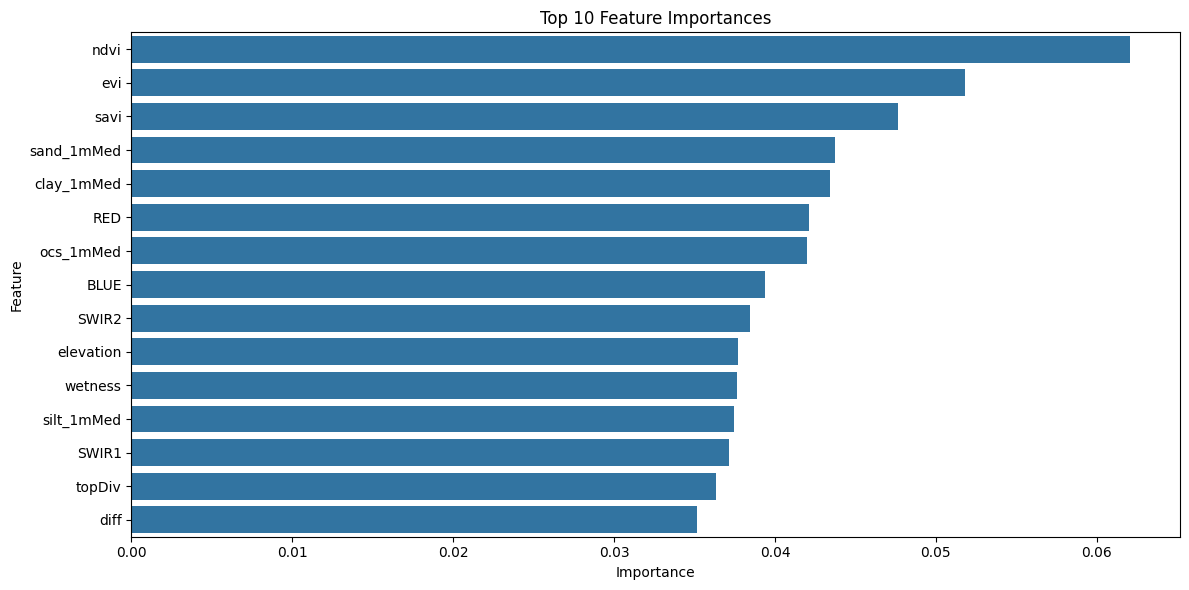

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


target = 'CoverType'


drop_cols = compressed_data.select_dtypes(exclude='number').columns
features = compressed_data.drop(columns=drop_cols.tolist() + [target])

X = features
y = compressed_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.2f}")


importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


## Using a simple Random forest model to filter and rank features.We see that the top features to be selected are   ndvi,evi,savi,sand_1mMed,clay_1mMed,RED,ocs_1mMed,BLUE,SWIR2,elevation.

## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rfe = RFE(estimator=RandomForestClassifier(n_estimators=100))
rfe.fit(X, y)
# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)
print("Optimal number of features:", rfe.n_features_)


Selected Features: Index(['BLUE', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'clay_1mMed', 'elevation',
       'evi', 'ndvi', 'sand_1mMed', 'savi', 'silt_1mMed', 'topDiv', 'wetness'],
      dtype='object')
Optimal number of features: 14


# Simple correlation adided in the inital filtering, RFE was computationally costly to run however gave us a fine-tuned subset of variables to work with. Random Forest feature importance graph give more interpretability and a smaller subset of features. This approach offered the most practical and useful feature selection approach.

# Modeling

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [15]:
pred=compressed_data[['BLUE', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'clay_1mMed', 'elevation','evi', 'ndvi', 'sand_1mMed', 'savi', 'silt_1mMed', 'topDiv', 'wetness']]
target=compressed_data['CoverType']

In [16]:
X = pred
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = []
models.append(('LG', LogisticRegression()))
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('MLP', MLPRegressor()))
models.append(('XGBoost', XGBRegressor()))

  8%|▊         | 1/12 [00:25<04:37, 25.24s/it]

Coefficients for LG:  [[ 4.54869225e-07  3.79801335e-06  7.03797882e-07  2.98550057e-06
   1.45437529e-06  6.25544997e-03 -1.32965736e-04  2.84303014e-06
  -1.70934796e-06 -7.66916050e-05  1.84178459e-06  6.18358113e-04
  -3.26404658e-03 -1.02047886e-06]
 [ 8.90849068e-08 -3.44600123e-06  2.13056846e-06  3.14020630e-06
   3.70867074e-06 -1.44459217e-03  4.64035941e-04 -1.27248529e-05
  -1.50866115e-05 -2.08188728e-04 -9.24031809e-06 -1.81422558e-03
  -7.74557055e-04 -4.17082856e-06]
 [ 9.19562374e-05 -2.38825021e-04  2.08855425e-04  2.61152317e-04
   2.65844381e-04 -4.02967735e-04  2.51955221e-04 -8.92198284e-04
  -1.20640307e-03  1.64380820e-03 -7.40714854e-04 -5.50051220e-03
   2.14592943e-03 -2.81943902e-04]
 [-7.00282086e-07  1.17546783e-07 -1.66390194e-06 -7.70926303e-07
  -1.46689991e-06 -2.79737448e-03  8.79576742e-05  4.94313261e-06
   3.19136329e-06  1.49660948e-04  3.02847072e-06  7.43406800e-03
  -2.27507709e-03  3.79535354e-07]
 [-9.12422177e-05  4.32143329e-04 -2.09093753e

 17%|█▋        | 2/12 [00:25<01:46, 10.62s/it]

Coefficients for LR:  [-6.77687613e+00 -1.23686614e+01 -2.12949037e+01  3.17766538e+01
  1.16751626e+01  2.12068416e-04 -6.43168138e-06 -9.85589461e-04
  4.26161833e-01  2.32766335e-04 -1.73738273e+00  5.27303485e-04
  9.20696074e-02  4.03522498e+01]
LinearRegression()
	Training time: 0.057s
	Prediction time: 0.002s
	Explained variance: 0.11132950999156732
	Mean absolute error: 0.20592580882721742
	R2 score: 0.11132524238614327
	Mean Squared Error: 0.21646385168835836
	Root Mean Squared Error: 0.465256758885197



 25%|██▌       | 3/12 [00:25<00:52,  5.87s/it]

Coefficients for Ridge:  [ 7.48865856e-01  1.37010949e+00 -3.18687868e+00  3.22844922e+00
 -4.55960950e+00  2.10612809e-04 -2.46851112e-05 -7.58416819e-04
  4.95668975e-01  2.45111759e-04 -1.65236434e+00  5.22307180e-04
  8.83909096e-02  1.90906564e+00]
Ridge()
	Training time: 0.010s
	Prediction time: 0.001s
	Explained variance: 0.10488188133762522
	Mean absolute error: 0.20680547949981606
	R2 score: 0.10487610793578617
	Mean Squared Error: 0.21803473515412566
	Root Mean Squared Error: 0.4669418969787629



 33%|███▎      | 4/12 [00:26<00:29,  3.66s/it]

Coefficients for Lasso:  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.55465469e-04  1.98923878e-06  0.00000000e+00
  0.00000000e+00  3.19460201e-04  0.00000000e+00  4.82862027e-04
  0.00000000e+00  0.00000000e+00]
Lasso()
	Training time: 0.015s
	Prediction time: 0.001s
	Explained variance: 0.018148411720956825
	Mean absolute error: 0.21569372679081805
	R2 score: 0.018147535497640588
	Mean Squared Error: 0.23916012515822793
	Root Mean Squared Error: 0.4890400036379723



 42%|████▏     | 5/12 [00:26<00:16,  2.42s/it]

Coefficients for ElasticNet:  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.14069348e-04  2.42810911e-06  0.00000000e+00
  0.00000000e+00  3.96523390e-04  0.00000000e+00  5.73635201e-04
  0.00000000e+00  0.00000000e+00]
ElasticNet()
	Training time: 0.014s
	Prediction time: 0.001s
	Explained variance: 0.019477407232390442
	Mean absolute error: 0.21471092056095648
	R2 score: 0.019476255051987135
	Mean Squared Error: 0.2388364749700311
	Root Mean Squared Error: 0.4887089880184639



 50%|█████     | 6/12 [00:28<00:14,  2.50s/it]

KNeighborsRegressor()
	Training time: 0.191s
	Prediction time: 0.187s
	Explained variance: 0.25810380638473274
	Mean absolute error: 0.14718233246301132
	R2 score: 0.25810366596269396
	Mean Squared Error: 0.18071148825065278
	Root Mean Squared Error: 0.4251017387057512



 58%|█████▊    | 7/12 [00:51<00:45,  9.14s/it]

DecisionTreeRegressor()
	Training time: 2.606s
	Prediction time: 0.004s
	Explained variance: -0.43622872806543334
	Mean absolute error: 0.16160791993037424
	R2 score: -0.4365839253693302
	Mean Squared Error: 0.3499238468233246
	Root Mean Squared Error: 0.5915436136273678



 67%|██████▋   | 8/12 [1:08:54<1:27:03, 1305.87s/it]

SVR()
	Training time: 63.369s
	Prediction time: 9.294s
	Explained variance: 0.04318364929722551
	Mean absolute error: 0.20629945131524158
	R2 score: 0.04318280205728864
	Mean Squared Error: 0.2330620221333405
	Root Mean Squared Error: 0.48276497608395386



 75%|███████▌  | 9/12 [1:34:26<1:08:50, 1376.72s/it]

RandomForestRegressor()
	Training time: 150.283s
	Prediction time: 0.314s
	Explained variance: 0.36161688751163157
	Mean absolute error: 0.15884811067595012
	R2 score: 0.361253653663829
	Mean Squared Error: 0.1555861615233053
	Root Mean Squared Error: 0.39444411711078325



 83%|████████▎ | 10/12 [1:40:25<35:25, 1062.50s/it] 

GradientBoostingRegressor()
	Training time: 35.480s
	Prediction time: 0.022s
	Explained variance: 0.19068796670319454
	Mean absolute error: 0.18003918860739737
	R2 score: 0.19067319872402522
	Mean Squared Error: 0.1971362359264163
	Root Mean Squared Error: 0.44400026568282175



 92%|█████████▏| 11/12 [1:41:12<12:31, 751.62s/it] 

MLPRegressor()
	Training time: 3.719s
	Prediction time: 0.052s
	Explained variance: -0.31374700932377864
	Mean absolute error: 0.33134482332477194
	R2 score: -0.32536636886456805
	Mean Squared Error: 0.32283341756320916
	Root Mean Squared Error: 0.5681843165410404



100%|██████████| 12/12 [1:41:22<00:00, 506.87s/it]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
	Training time: 1.924s
	Prediction time: 0.034s
	Explained variance: 0.33105613033021897
	Mean absolute error: 0.16523732244968414
	R2 score: 0.3310536742210388
	Mean Squared Error: 0.16294227540493011
	Root Mean Squared Error: 0.4036610897831622



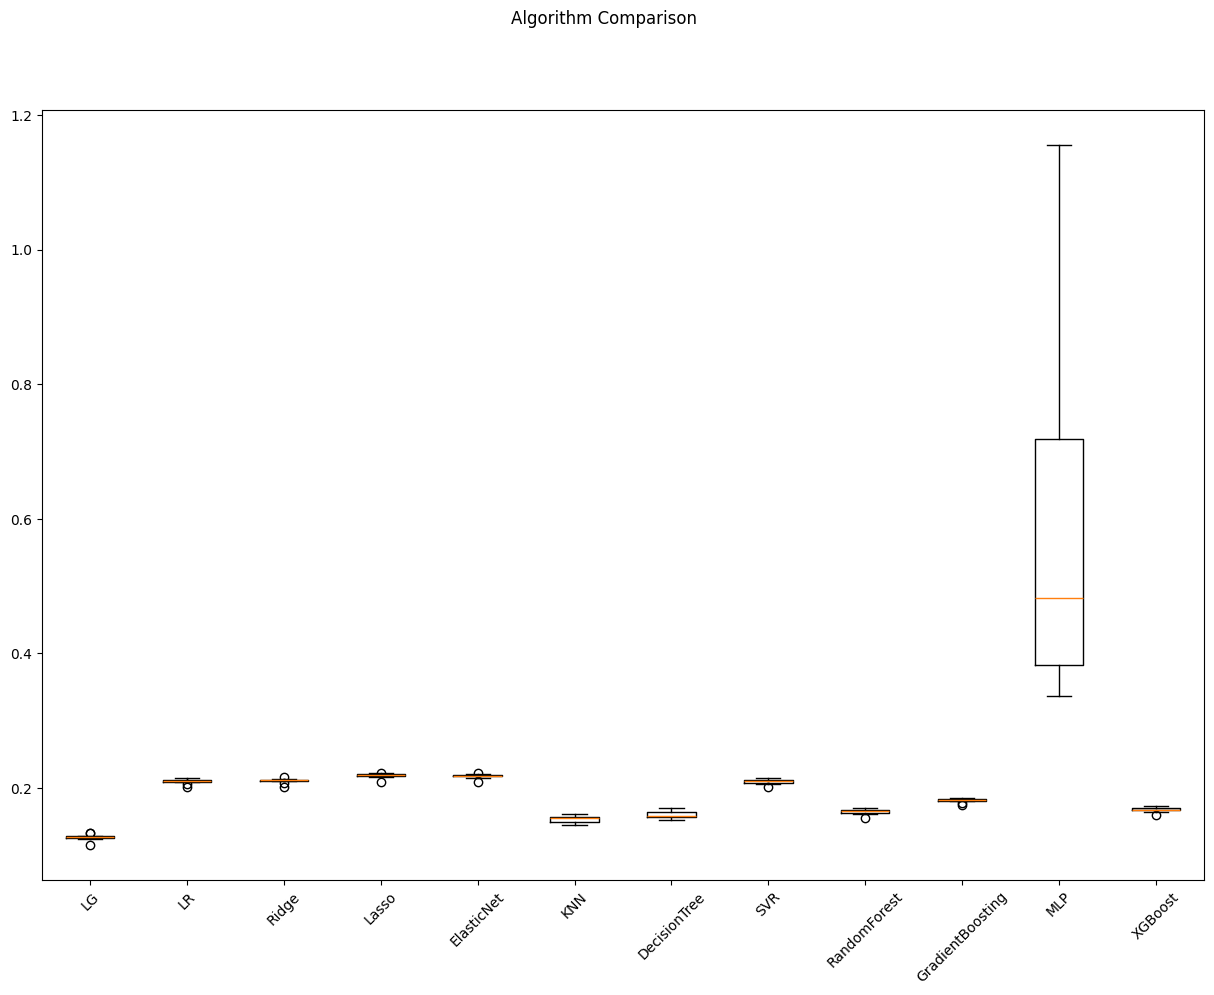


Models performance:
LG - Mean Absolute Error: 0.12391209747606614
KNN - Mean Absolute Error: 0.14718233246301132
RandomForest - Mean Absolute Error: 0.15884811067595012
DecisionTree - Mean Absolute Error: 0.16160791993037424
XGBoost - Mean Absolute Error: 0.16523732244968414
GradientBoosting - Mean Absolute Error: 0.18003918860739737
LR - Mean Absolute Error: 0.20592580882721742
SVR - Mean Absolute Error: 0.20629945131524158
Ridge - Mean Absolute Error: 0.20680547949981606
ElasticNet - Mean Absolute Error: 0.21471092056095648
Lasso - Mean Absolute Error: 0.21569372679081805
MLP - Mean Absolute Error: 0.33134482332477194


In [17]:
import time
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, mean_squared_error
from math import sqrt

results = []
models_stats = []
names = []
scoring = 'neg_mean_absolute_error' # Change to 'r2' for R2, 'neg_mean_squared_error' for MSE, or 'neg_root_mean_squared_error' for RMSE

for name, model in tqdm(models):
    start = time.time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time.time() - start
    cv_results = -1 * cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

    # Make predictions
    start = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start

    # Coefficients are not available for all models
    if hasattr(model, 'coef_'):
        print(f"Coefficients for {name}: ", model.coef_)

    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMean Squared Error:", mean_squared_error(y_test, y_pred))
    print("\tRoot Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
    print()

    model_stats = {
        'name': name,
        'mean_score': cv_results.mean(),
        'std_score': cv_results.std(),
        'explained_variance': explained_variance_score(y_test, y_pred),
        'mean_absolute_error': mean_absolute_error(y_test, y_pred),
        'r2_score': r2_score(y_test, y_pred),
        'mean_squared_error': mean_squared_error(y_test, y_pred),
        'root_mean_squared_error': sqrt(mean_squared_error(y_test, y_pred)),
    }

    models_stats.append(model_stats)

# Boxplot to compare algorithms
fig = pyplot.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
pyplot.show()

# Sorting the models based on mean absolute error
models_stats.sort(key=lambda x: x['mean_absolute_error'])

print("\nModels performance:")
for model in models_stats:
    print(f"{model['name']} - Mean Absolute Error: {model['mean_absolute_error']}")